<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> MLSR <br>(Mini Project 2) 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>


# GROUP 5 : 


*   BHARATH K M (PA2212049010019) 
*   DIWAHAR A K (PA2212049010012)
*   RAGHUNATH M (PA2212049010050)

#**This is only the notebook used for execution. Refer Report file for inferences.**

### Import the required libraries

In [1]:
# 'Pandas' 
import pandas as pd 

# 'Numpy' 
import numpy as np

# 'SciPy'
from scipy.stats import norm 

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import RobustScaler

# to set the digits after decimal place 
pd.options.display.float_format = '{:.5f}'.format

# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Global Variables
executeOutliers=False
doScaling=True
doTransformation=True
multicollenarityFeatureElimination=False # Based on VIF. 

#QUESTION 1

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1.  Read the data coefficients. Load the csv file and set the first column as index </b>
                </font>
            </div>
        </td>
    </tr>
</table>



##Loading the Data

In [3]:
resale_vehicle_df=pd.read_csv("https://github.com/akdiwahar/dataset/raw/main/SRM/MLSR/CT2/download.csv",index_col=0)

In [4]:
resale_vehicle_df.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
ritz,2014,3.35000,5.59000,27000,Petrol,Dealer,Manual,0
sx4,2013,4.75000,9.54000,43000,Diesel,Dealer,Manual,0
ciaz,2017,7.25000,9.85000,6900,Petrol,Dealer,Manual,0
wagon r,2011,2.85000,4.15000,5200,Petrol,Dealer,Manual,0
swift,2014,4.60000,6.87000,42450,Diesel,Dealer,Manual,0


In [5]:
resale_vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, ritz to brio
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 21.2+ KB


In [6]:
resale_vehicle_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.00000,301.00000,301.00000,301.00000,301.00000
mean,2013.62791,4.66130,7.62847,36947.20598,0.04319
std,2.89155,5.08281,8.64412,38886.88388,0.24791
min,2003.00000,0.10000,0.32000,500.00000,0.00000
25%,2012.00000,0.90000,1.20000,15000.00000,0.00000
50%,2014.00000,3.60000,6.40000,32000.00000,0.00000
75%,2016.00000,6.00000,9.90000,48767.00000,0.00000
max,2018.00000,35.00000,92.60000,500000.00000,3.00000


Our objective is to predict the selling price of the cars data.

**The data definition is as follows:** <br><br>
**Car_Name:** name of the car <br>

**YearThis:** year in which the car was bought <br>

**Present_Price:** current ex-showroom price of the car (in lakhs)<br>

**Kms_Driven:** distance completed by the car in km <br>

**Fuel_Type:** fuel type of the car <br>

**Seller_Type:** defines whether the seller is a dealer or an individual<br>

**Transmission:** defines whether the car is manual or automatic <br>

**Owner:** defines the number of owners the car has previously had <br>

**Selling_Price:** price the owner wants to sell the car at (in lakhs) (response variable)

## Identification of Numerical and Categorical Data

In [7]:
resale_vehicle_df["Fuel_Type"]=resale_vehicle_df["Fuel_Type"].astype("category")
resale_vehicle_df["Seller_Type"]=resale_vehicle_df["Seller_Type"].astype("category")
resale_vehicle_df["Transmission"]=resale_vehicle_df["Transmission"].astype("category")
resale_vehicle_df["Owner"]=resale_vehicle_df["Owner"].astype("category")
    

In [8]:
resale_vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, ritz to brio
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Year           301 non-null    int64   
 1   Selling_Price  301 non-null    float64 
 2   Present_Price  301 non-null    float64 
 3   Kms_Driven     301 non-null    int64   
 4   Fuel_Type      301 non-null    category
 5   Seller_Type    301 non-null    category
 6   Transmission   301 non-null    category
 7   Owner          301 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 13.4+ KB


In [9]:
resale_vehicle_df.describe(exclude=np.number)

,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301,301,301
unique,3,2,2,3
top,Petrol,Dealer,Manual,0
freq,239,195,261,290


In [10]:
for eachFeature in resale_vehicle_df.select_dtypes(exclude=np.number).columns:
  print(eachFeature,":", list(resale_vehicle_df[eachFeature].unique()))

Fuel_Type : ['Petrol', 'Diesel', 'CNG']
Seller_Type : ['Dealer', 'Individual']
Transmission : ['Manual', 'Automatic']
Owner : [0, 1, 3]


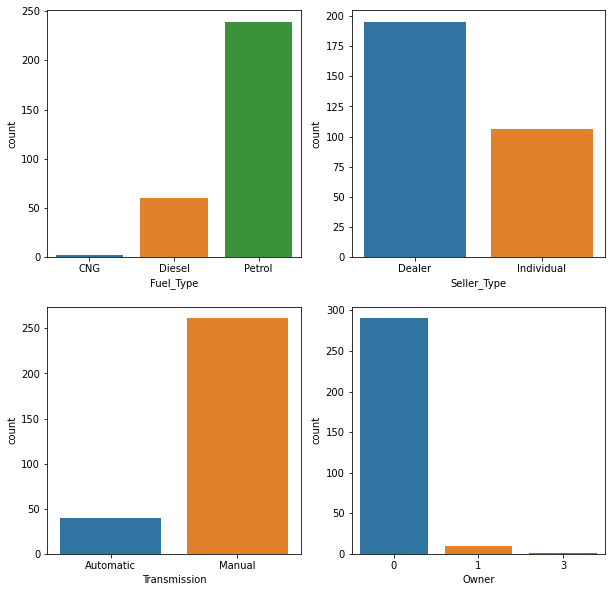

In [11]:
pltcount=1
plt.figure(figsize=(10,10))
for eachFeature in resale_vehicle_df.select_dtypes(exclude=np.number).columns:
  data=resale_vehicle_df[eachFeature].value_counts().to_frame().reset_index()
  data.columns=[eachFeature,"count"]
  plt.subplot(2,2,pltcount)
  pltcount+=1
  sns.barplot(x=data[eachFeature],y=data["count"])

## Null Check

In [12]:
resale_vehicle_df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Feature - Year Treatment

In [13]:
resale_vehicle_df["Age"]=2022-resale_vehicle_df["Year"]
resale_vehicle_df.drop("Year",axis=1,inplace=True)

In [14]:
resale_vehicle_df.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
Car_Name,,,,,,,,
ritz,3.35000,5.59000,27000,Petrol,Dealer,Manual,0,8
sx4,4.75000,9.54000,43000,Diesel,Dealer,Manual,0,9


##Duplicate Removal

In [15]:
resale_vehicle_df[resale_vehicle_df.duplicated(keep=False)]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
Car_Name,,,,,,,,
ertiga,7.75000,10.79000,43000,Diesel,Dealer,Manual,0,6
ertiga,7.75000,10.79000,43000,Diesel,Dealer,Manual,0,6
fortuner,23.00000,30.61000,40000,Diesel,Dealer,Automatic,0,7
fortuner,23.00000,30.61000,40000,Diesel,Dealer,Automatic,0,7


In [16]:
resale_vehicle_df=resale_vehicle_df.drop_duplicates()

##Outlier Treatment

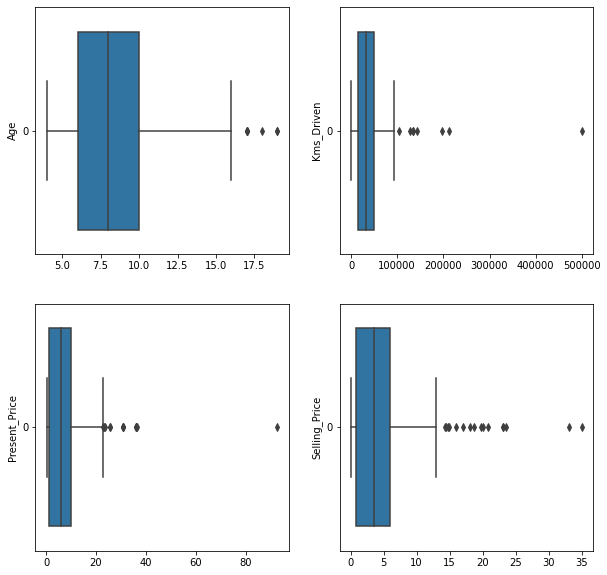

In [17]:
columns=resale_vehicle_df.select_dtypes(include=np.number).columns

pltcount=len(columns)
plt.figure(figsize=(10,10))
for eachFeature in columns:
  
  plt.subplot(2,2,pltcount)
  pltcount-=1
  plt.ylabel(eachFeature)
  sns.boxplot( data=resale_vehicle_df[eachFeature] ,orient="h")

plt.show()

In [18]:
def outliers(df):
  indexesToRevome=[]
  index_name=df.index.name
  df=df.reset_index()
  columns=df.select_dtypes(include=np.number).columns
  
  for eachCol in columns:
    print("Processing ",eachCol)
    q1=df[eachCol].quantile(0.25)
    q3=df[eachCol].quantile(0.75)
    IQR=q3-q1
    whisherLeft=q1-IQR*1.5
    whisherRight=q3+IQR*1.5
    indexes=df.index[(whisherLeft>df[eachCol]) | (whisherRight<df[eachCol] )].tolist()
    if (len(indexes)>0):
      print("Index in outlier for ",eachCol," is ", indexes, "\n")
      indexesToRevome=indexesToRevome + indexes
  #noOfRecords=dfturnout[dfturnout[eachCol]>whisherRight and dfturnout[eachCol]<whisherLeft].size()
  #print(eachCol,q1,q3,whisherLeft,whisherRight, noOfRecords)
  #Unique entries
  indexesToRevome= list(set(indexesToRevome))
  print("Finalized index to remove from source :", indexesToRevome)

  df=df.drop(index=indexesToRevome)
  df=df.set_index(index_name)
  return df,indexesToRevome

In [19]:
'''
finalindexesToRevome={}
indexes={}
if (executeOutliers):
  print("Outlier handling with IQR  ")
  resale_vehicle_df_copy=resale_vehicle_df.copy()
  #Iterate to make sure no outliers
  resale_vehicle_df1,indexes=outliers(resale_vehicle_df)
  finalindexesToRevome=set(finalindexesToRevome).union(set(indexes))
  resale_vehicle_df1,indexes=outliers(resale_vehicle_df1)
  finalindexesToRevome=set(finalindexesToRevome).union(set(indexes))
  resale_vehicle_df1,indexes=outliers(resale_vehicle_df1)
  finalindexesToRevome=set(finalindexesToRevome).union(set(indexes))
  print("finalindexesToRevome:",finalindexesToRevome,len(finalindexesToRevome))
else:
  print("Outlier Treatment is disabled")

#Outliers Records. 
location=list(finalindexesToRevome)
outlier_records=resale_vehicle_df.iloc[location,]
'''


'\nfinalindexesToRevome={}\nindexes={}\nif (executeOutliers):\n  print("Outlier handling with IQR  ")\n  resale_vehicle_df_copy=resale_vehicle_df.copy()\n  #Iterate to make sure no outliers\n  resale_vehicle_df1,indexes=outliers(resale_vehicle_df)\n  finalindexesToRevome=set(finalindexesToRevome).union(set(indexes))\n  resale_vehicle_df1,indexes=outliers(resale_vehicle_df1)\n  finalindexesToRevome=set(finalindexesToRevome).union(set(indexes))\n  resale_vehicle_df1,indexes=outliers(resale_vehicle_df1)\n  finalindexesToRevome=set(finalindexesToRevome).union(set(indexes))\n  print("finalindexesToRevome:",finalindexesToRevome,len(finalindexesToRevome))\nelse:\n  print("Outlier Treatment is disabled")\n\n#Outliers Records. \nlocation=list(finalindexesToRevome)\noutlier_records=resale_vehicle_df.iloc[location,]\n'

In [20]:
indexes=[]
if (executeOutliers):
  print("Outlier handling with IQR  ")
  resale_vehicle_df_copy=resale_vehicle_df.copy()
  #Iterate to make sure no outliers
  resale_vehicle_df,indexes=outliers(resale_vehicle_df)
  resale_vehicle_df,indexes=outliers(resale_vehicle_df)
  resale_vehicle_df,indexes=outliers(resale_vehicle_df)

else:
  print("Outlier Treatment is disabled")




Outlier Treatment is disabled


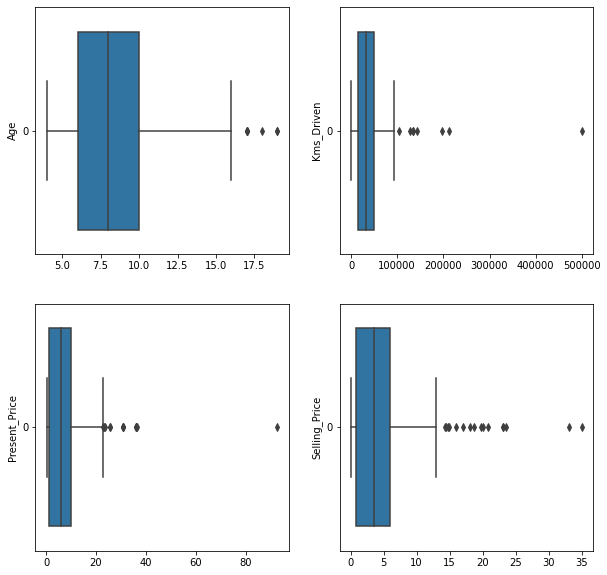

In [21]:
columns=resale_vehicle_df.select_dtypes(include=np.number).columns

pltcount=len(columns)
plt.figure(figsize=(10,10))
for eachFeature in columns:
  
  plt.subplot(2,2,pltcount)
  pltcount-=1
  plt.ylabel(eachFeature)
  sns.boxplot( data=resale_vehicle_df[eachFeature] ,orient="h")

plt.show()


In [25]:
resale_vehicle_df.shape

(299, 8)

## Split Numerical and categorical Data

In [26]:
vehicle_num=resale_vehicle_df.select_dtypes(include=[np.number]) 
vehicle_cat=resale_vehicle_df.select_dtypes(exclude=[np.number]) 

In [27]:
vehicle_cat.head(2)

,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,
ritz,Petrol,Dealer,Manual,0
sx4,Diesel,Dealer,Manual,0


In [28]:
vehicle_num.head(2)

,Selling_Price,Present_Price,Kms_Driven,Age
Car_Name,,,,
ritz,3.35000,5.59000,27000,8
sx4,4.75000,9.54000,43000,9


##Numerical Data Processing

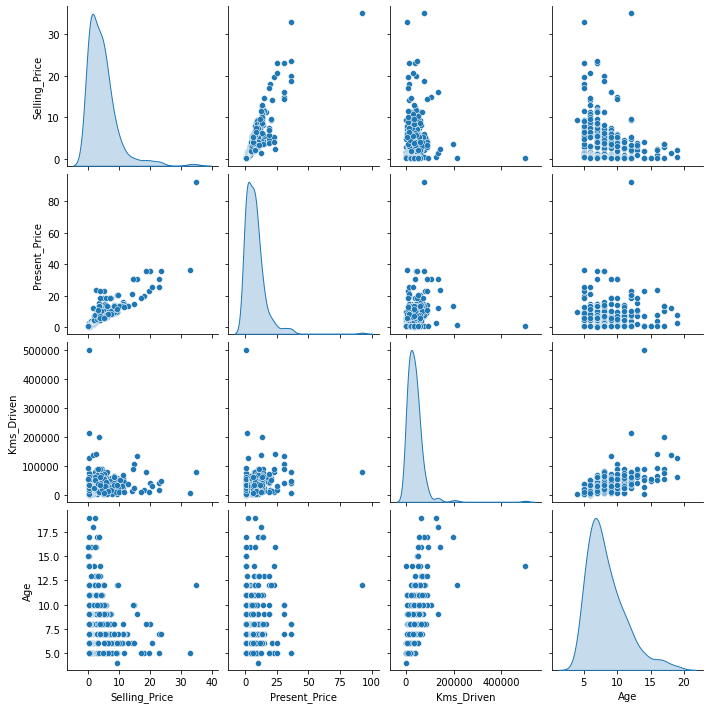

In [29]:
car_n=vehicle_num.reset_index().drop("Car_Name",axis=1)
sns.pairplot(car_n.reindex(), diag_kind='kde')
plt.show()

In [30]:
vehicle_num.corr()

,Selling_Price,Present_Price,Kms_Driven,Age
Selling_Price,1.00000,0.87638,0.02857,-0.23437
Present_Price,0.87638,1.00000,0.20525,0.05356
Kms_Driven,0.02857,0.20525,1.00000,0.52571
Age,-0.23437,0.05356,0.52571,1.00000


##Catagorical Data Processing

In [31]:
for eachFeature in vehicle_cat.columns:
  print(eachFeature,":", list(vehicle_cat[eachFeature].unique()))

Fuel_Type : ['Petrol', 'Diesel', 'CNG']
Seller_Type : ['Dealer', 'Individual']
Transmission : ['Manual', 'Automatic']
Owner : [0, 1, 3]


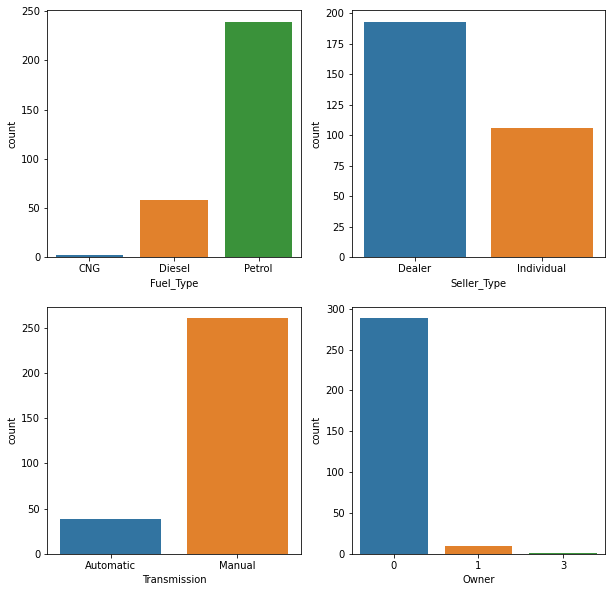

In [32]:
pltcount=1
plt.figure(figsize=(10,10))
for eachFeature in vehicle_cat.columns:
  data=vehicle_cat[eachFeature].value_counts().to_frame().reset_index()
  data.columns=[eachFeature,"count"]
  plt.subplot(2,2,pltcount)
  pltcount+=1
  sns.barplot(x=data[eachFeature],y=data["count"])

## Encoding

In [33]:
vehicle_cat=pd.get_dummies(vehicle_cat,  drop_first=True, columns=["Transmission","Seller_Type"])

In [34]:
vehicle_cat["Owner"]=vehicle_cat["Owner"].astype("uint8")

In [35]:
vehicle_cat=pd.get_dummies(vehicle_cat, columns=["Fuel_Type"])

In [36]:
#Fuel-Type Gas has only 2 observation, hence do not want to remove 
vehicle_cat.drop("Fuel_Type_Petrol",axis=1,inplace=True)

In [37]:
vehicle_cat.head()

,Owner,Transmission_Manual,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel
Car_Name,,,,,
ritz,0,1,0,0,0
sx4,0,1,0,0,1
ciaz,0,1,0,0,0
wagon r,0,1,0,0,0
swift,0,1,0,0,1


##Merge Numerical and Categorical 

In [38]:
vehicle=pd.concat([vehicle_num,vehicle_cat],axis=1)

## Feature Transformation

In [39]:
vehicle.Owner.value_counts()

0    288
1     10
3      1
Name: Owner, dtype: int64

In [40]:
vehicle_before_Transformation1=vehicle.copy()

In [41]:
vehicle=vehicle_before_Transformation1.copy()

In [42]:
skewKurt= pd.DataFrame()
doTransformation=True
if (doTransformation):
  vehicle_before_Transformation=vehicle.copy()
  skewKurt["Skew_Before"]=vehicle.skew()
  skewKurt["Kurt_Before"]=vehicle.kurt()

  for eachCol in vehicle.columns:
    vehicle[eachCol]=np.power(vehicle[eachCol],1/3)

  skewKurt["Skew_After_cubic-rt"]=vehicle.skew()
  skewKurt["Kurt_After_cubic-rt"]=vehicle.kurt()
else:
  skewKurt["Skew"]=vehicle.skew()
  skewKurt["Kurt"]=vehicle.kurt()
  print("Transformation Not Enabled")
skewKurt

,Skew_Before,Kurt_Before,Skew_After_cubic-rt,Kurt_After_cubic-rt
Selling_Price,2.53652,9.48209,0.28263,-0.26446
Present_Price,4.18689,33.19508,0.33905,0.12346
Kms_Driven,6.41813,68.13042,0.36239,2.33334
Age,1.23688,1.50724,0.71008,0.11682
Owner,7.59060,72.82124,5.09532,24.87865
Transmission_Manual,-2.20577,2.88468,-2.20577,2.88468
Seller_Type_Individual,0.61133,-1.63727,0.61133,-1.63727
Fuel_Type_CNG,12.16511,146.97300,12.16511,146.97300
Fuel_Type_Diesel,1.55566,0.42287,1.55566,0.42287


In [43]:
'''
skewKurt= pd.DataFrame()
doTransformation=True
if (doTransformation):
  vehicle_before_Transformation=vehicle.copy()
  skewKurt["Skew_Before"]=vehicle.skew()
  skewKurt["Kurt_Before"]=vehicle.kurt()
  
  # Doing log transformation only for appicable  parameters. Other parameter are having 0 and 1. 
  vehicle["Selling_Price"]=np.log(vehicle["Selling_Price"])
  vehicle["Present_Price"]=np.log(vehicle["Present_Price"])
  vehicle["Kms_Driven"]=np.log(vehicle["Kms_Driven"])
  vehicle["Age"]=np.log(vehicle["Age"])
  vehicle["Owner"]=np.log(vehicle["Owner"])

  skewKurt["Skew_After_Log"]=vehicle.skew()
  skewKurt["Kurt_After_Log"]=vehicle.kurt()
else:
  skewKurt["Skew"]=vehicle.skew()
  skewKurt["Kurt"]=vehicle.kurt()
  print("Transformation Not Enabled")
skewKurt
'''

'\nskewKurt= pd.DataFrame()\ndoTransformation=True\nif (doTransformation):\n  vehicle_before_Transformation=vehicle.copy()\n  skewKurt["Skew_Before"]=vehicle.skew()\n  skewKurt["Kurt_Before"]=vehicle.kurt()\n  \n  # Doing log transformation only for appicable  parameters. Other parameter are having 0 and 1. \n  vehicle["Selling_Price"]=np.log(vehicle["Selling_Price"])\n  vehicle["Present_Price"]=np.log(vehicle["Present_Price"])\n  vehicle["Kms_Driven"]=np.log(vehicle["Kms_Driven"])\n  vehicle["Age"]=np.log(vehicle["Age"])\n  vehicle["Owner"]=np.log(vehicle["Owner"])\n\n  skewKurt["Skew_After_Log"]=vehicle.skew()\n  skewKurt["Kurt_After_Log"]=vehicle.kurt()\nelse:\n  skewKurt["Skew"]=vehicle.skew()\n  skewKurt["Kurt"]=vehicle.kurt()\n  print("Transformation Not Enabled")\nskewKurt\n'

##Feature Scaling 

In [44]:
scaler = RobustScaler()

vehicle_before_scaling=vehicle.copy()
if (doScaling):
  vehicle_scaled=scaler.fit_transform(vehicle)
  vehicle_scaled = pd.DataFrame(vehicle_scaled, index=vehicle.index, columns=vehicle.columns)
  vehicle=vehicle_scaled
else:
  print("Scaling Not Enabled")
vehicle.head(5)

,Selling_Price,Present_Price,Kms_Driven,Age,Owner,Transmission_Manual,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel
Car_Name,,,,,,,,,
ritz,-0.02695,-0.04852,-0.14687,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
sx4,0.18530,0.27191,0.27609,0.23742,0.00000,0.00000,0.00000,0.00000,1.00000
ciaz,0.47770,0.29295,-1.06792,-0.85980,0.00000,0.00000,0.00000,0.00000,0.00000
wagon r,-0.11714,-0.20381,-1.21184,0.66401,0.00000,0.00000,0.00000,0.00000,0.00000
swift,0.16475,0.06837,0.26348,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


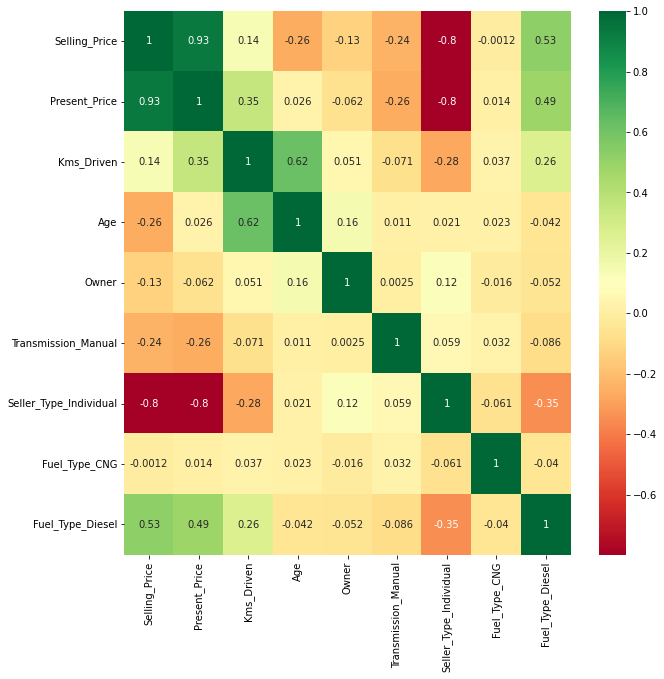

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(vehicle.corr(),annot=True,cmap="RdYlGn")

#Question 2

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model and interpret the beta coefficients </b>
                </font>
            </div>
        </td>
    </tr>
</table>

        Hint: A full model is a model which includes all the features 

## Dependent and Independent Features

In [46]:
X=vehicle.drop("Selling_Price",axis=1)
y=vehicle["Selling_Price"]

## Feature Selection(multicollenarityFeatureElimination) Based on VIF

In [47]:

vifthershold=5

features=X.columns.to_list()

if (multicollenarityFeatureElimination):
  vifIterate=True
  while(vifIterate):
    X1=X[features]
    vf= [vif(X1.values,i) for i in  range(X1.shape[1])]
    vech_vif=pd.DataFrame(vf, index=X1.columns, columns=["VIF"]).sort_values(by="VIF",ascending=False)
    #print(vech_vif)
    vech_vif=vech_vif.reset_index()
    feature=vech_vif["index"][0]
    feature_vif=vech_vif["VIF"][0]
    if (feature_vif>5):
      
      features.remove(feature)
      print("Feature",feature, "[VIF=",feature_vif,"] has multicolinearity with other features ",features)
    else:
      vifIterate=False
else:
  print("VIF not considered")

VIF not considered


In [48]:
if (multicollenarityFeatureElimination):
  X1=X[features]
else:
  X1=X
X1 = sm.add_constant(X1)

In [49]:
X1.head()

,const,Present_Price,Kms_Driven,Age,Owner,Transmission_Manual,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel
Car_Name,,,,,,,,,
ritz,1.00000,-0.04852,-0.14687,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
sx4,1.00000,0.27191,0.27609,0.23742,0.00000,0.00000,0.00000,0.00000,1.00000
ciaz,1.00000,0.29295,-1.06792,-0.85980,0.00000,0.00000,0.00000,0.00000,0.00000
wagon r,1.00000,-0.20381,-1.21184,0.66401,0.00000,0.00000,0.00000,0.00000,0.00000
swift,1.00000,0.06837,0.26348,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


## Test-Train Split

In [50]:
#splitting train and test data
X_train,X_test,Y_train,Y_test=train_test_split(X1,y,test_size=0.2,random_state=6)

##Model Building with Complete Features

In [51]:
lin_reg_model=sm.OLS(Y_train,X_train)
model = lin_reg_model.fit()


In [52]:
model.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     746.6
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          6.75e-160
Time:                        11:26:12   Log-Likelihood:                 157.17
No. Observations:                 239   AIC:                            -296.3
Df Residuals:                     230   BIC:                            -265.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0496      0.013      3.769      0.000       0.024       0.076
Present_Price              0.8696      0.026     33.408      0.000       0.818       0.921
Kms_Driven                -0.0430      0.015     -2.923      0.004      -0.072      -0.014
Age                       -0.2366      0.017    -13.799      0.000      -0.270      -0.203
Owner                     -0.0991      0.044     -2.245      0.026      -0.186      -0.012
Transmission_Manual       -0.0035      0.025     -0.140      0.889      -0.053       0.046
Seller_Type_Individual    -0.1666      0.030     -5.486      0.000      -0.226      -0.107
Fuel_Type_CNG             -0.0939      0.129     -0.730      0.466      -0.348       0.160
Fuel_Type_Diesel           0.1421      0.024      5.859      0.000       0.094       0.190
==============================================================================
Omnibus:                        9.141   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.875
Skew:                          -0.373   Prob(JB):                      0.00717
Kurtosis:                       3.660   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
index=0
formula=""
for eachFeature in model.params.index:
  if (len(model.params.index) == index+1):
    formula= formula + "("+str(np.round(model.params[index],5)) + ") * " +  eachFeature 
  else:
    formula= formula + "("+str(np.round(model.params[index],5)) + ") * " +  eachFeature + " + "
  index+=1

formula

'(0.04959) * const + (0.8696) * Present_Price + (-0.043) * Kms_Driven + (-0.23655) * Age + (-0.09915) * Owner + (-0.00353) * Transmission_Manual + (-0.16664) * Seller_Type_Individual + (-0.09393) * Fuel_Type_CNG + (0.14212) * Fuel_Type_Diesel'

In [54]:
X1.head(4)

,const,Present_Price,Kms_Driven,Age,Owner,Transmission_Manual,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel
Car_Name,,,,,,,,,
ritz,1.00000,-0.04852,-0.14687,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
sx4,1.00000,0.27191,0.27609,0.23742,0.00000,0.00000,0.00000,0.00000,1.00000
ciaz,1.00000,0.29295,-1.06792,-0.85980,0.00000,0.00000,0.00000,0.00000,0.00000
wagon r,1.00000,-0.20381,-1.21184,0.66401,0.00000,0.00000,0.00000,0.00000,0.00000


In [55]:
Y_predict=model.predict(X_test)

### Feature selection based on p-value iteration (Do not execute this)

In [56]:
features_seleceted = list(model.pvalues.index)

features_seleceted

['const',
 'Present_Price',
 'Kms_Driven',
 'Age',
 'Owner',
 'Transmission_Manual',
 'Seller_Type_Individual',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel']

####Iteration1

In [ ]:
model.pvalues.reset_index().sort_values(by=0,ascending=False)

,index,0
5,Transmission_Manual,0.58634
7,Fuel_Type_CNG,0.47656
2,Kms_Driven,0.00327
4,Owner,0.00050
6,Seller_Type_Individual,0.00001
8,Fuel_Type_Diesel,0.00000
3,Age,0.00000
0,const,0.00000
1,Present_Price,0.00000


In [ ]:
features_seleceted.remove("Fuel_Type_CNG")

In [ ]:
lin_reg_model=sm.OLS(Y_train,X_train[features_seleceted])
model1 = lin_reg_model.fit()
model1.pvalues.reset_index().sort_values(by=0,ascending=False)

,index,0
5,Transmission_Manual,0.57462
2,Kms_Driven,0.00325
4,Owner,0.00051
6,Seller_Type_Individual,0.00001
7,Fuel_Type_Diesel,0.00000
3,Age,0.00000
0,const,0.00000
1,Present_Price,0.00000


####Iteration2

In [ ]:
features_seleceted.remove("Transmission_Manual")

In [ ]:
lin_reg_model=sm.OLS(Y_train,X_train[features_seleceted])
model1 = lin_reg_model.fit()
model1.pvalues.reset_index().sort_values(by=0,ascending=False)

,index,0
2,Kms_Driven,0.00338
4,Owner,0.00051
5,Seller_Type_Individual,0.00001
6,Fuel_Type_Diesel,0.00000
3,Age,0.00000
0,const,0.00000
1,Present_Price,0.00000


In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     980.6
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          9.43e-162
Time:                        02:19:43   Log-Likelihood:                 458.91
No. Observations:                 239   AIC:                            -903.8
Df Residuals:                     232   BIC:                            -879.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3067      0.016     19.336      0.000       0.275       0.338
Present_Price              0.9559      0.028     34.519      0.000       0.901       1.010
Kms_Driven                -0.0802      0.027     -2.961      0.003      -0.134      -0.027
Age                       -0.2866      0.022    -13.306      0.000      -0.329      -0.244
Owner                     -0.0335      0.010     -3.525      0.001      -0.052      -0.015
Seller_Type_Individual    -0.0397      0.009     -4.593      0.000      -0.057      -0.023
Fuel_Type_Diesel           0.0383      0.007      5.632      0.000       0.025       0.052
==============================================================================
Omnibus:                       31.219   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.097
Skew:                          -0.760   Prob(JB):                     2.18e-11
Kurtosis:                       4.619   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question 3

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the impact of fuel type of cars on the selling price? 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
vehicle_cat.Fuel_Type_Diesel.value_counts()

0    241
1     58
Name: Fuel_Type_Diesel, dtype: int64

In [58]:
resale_vehicle_df.Fuel_Type.value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [59]:
model.pvalues

const                    0.00021
Present_Price            0.00000
Kms_Driven               0.00381
Age                      0.00000
Owner                    0.02572
Transmission_Manual      0.88891
Seller_Type_Individual   0.00000
Fuel_Type_CNG            0.46619
Fuel_Type_Diesel         0.00000
dtype: float64

In [60]:
model.params

const                     0.04959
Present_Price             0.86960
Kms_Driven               -0.04300
Age                      -0.23655
Owner                    -0.09915
Transmission_Manual      -0.00353
Seller_Type_Individual   -0.16664
Fuel_Type_CNG            -0.09393
Fuel_Type_Diesel          0.14212
dtype: float64

There are three fuel Type in the given data
1. Petrol
2. Diesel 
3. Gas 

As per the Fuel_Type_Diesel, the p-value is almost 0, indicates feature  is significant

As per the Fuel_Type_Diesel, the p-value is almost >0.05, indicates feature  is not significant


Impact: ( As per the model with all parameters. )



As per the coeffient received from the OLS model, 
1. when the fuel type is Diesel, selling price is increased by ???  
2. When the fuel type is CNG, the selling price is decreased by ????
3. When the fuel type is Petrol, there is no impact on selling price. 

Note that we have scaled the numerical data and transformed the numerical data. 

#Question 4

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Does the model significantly explain variation in the target variable? Justify your answer 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

            Regress the selling price over the transmission.
            
            Selling_Price ~ Transmission

In [61]:
model.pvalues.to_frame().sort_values(by=0,ascending=True)

,0
Present_Price,0.00000
Age,0.00000
Fuel_Type_Diesel,0.00000
Seller_Type_Individual,0.00000
const,0.00021
Kms_Driven,0.00381
Owner,0.02572
Fuel_Type_CNG,0.46619
Transmission_Manual,0.88891


In [62]:
changeunitimpact=model.params.to_frame().sort_values(by=0, ascending=False).reset_index()

changeunitimpact.columns=["Feature","coeff"]
changeunitimpact


,Feature,coeff
0,Present_Price,0.86960
1,Fuel_Type_Diesel,0.14212
2,const,0.04959
3,Transmission_Manual,-0.00353
4,Kms_Driven,-0.04300
5,Fuel_Type_CNG,-0.09393
6,Owner,-0.09915
7,Seller_Type_Individual,-0.16664
8,Age,-0.23655


In [63]:
changeunitimpact["text"]=changeunitimpact.apply(lambda x : "For each unit change in "+x[0] + " the selling price is increased by " + str(x[1]),axis=1)
changeunitimpact

,Feature,coeff,text
0,Present_Price,0.86960,For each unit change in Present_Price the sell...
1,Fuel_Type_Diesel,0.14212,For each unit change in Fuel_Type_Diesel the s...
2,const,0.04959,For each unit change in const the selling pric...
3,Transmission_Manual,-0.00353,For each unit change in Transmission_Manual th...
4,Kms_Driven,-0.04300,For each unit change in Kms_Driven the selling...
5,Fuel_Type_CNG,-0.09393,For each unit change in Fuel_Type_CNG the sell...
6,Owner,-0.09915,For each unit change in Owner the selling pric...
7,Seller_Type_Individual,-0.16664,For each unit change in Seller_Type_Individual...
8,Age,-0.23655,For each unit change in Age the selling price ...


RMSE: 0.11060612208969292


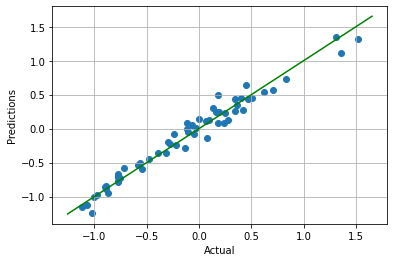

In [64]:
rmseval=rmse(Y_test,Y_predict)
print("RMSE:",rmseval)

plt.scatter(Y_test,Y_predict)
left, right = plt.xlim()
bottom, top = plt.ylim()
xpoints = ypoints = np.linspace(left, right)
plt.plot(xpoints, ypoints, color="g", label="xlim")
plt.grid()
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show() 


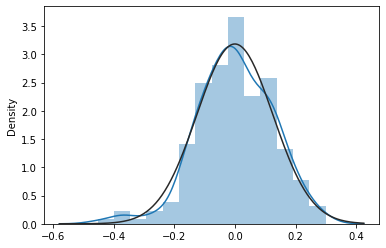

In [65]:
residual=model.resid
norm.fit(residual)
sns.distplot(residual,fit=norm)

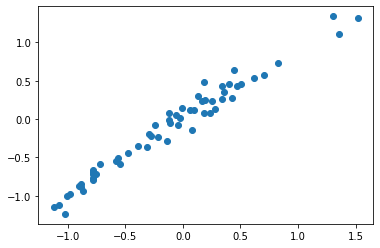

In [66]:
plt.scatter(Y_test,Y_predict)

In [67]:
#Iteration 1
feature_regress=list(X.columns)
regress=pd.DataFrame()
selected_Feature=[]
for eachFeature in feature_regress:
  final_selected_feature=selected_Feature.copy()
  final_selected_feature.append(eachFeature)
  lin_reg_model=sm.OLS(Y_train,X_train[final_selected_feature])
  model2 = lin_reg_model.fit()
  y_predict=model2.predict(X_test[final_selected_feature])
  rmseval=rmse(Y_test,y_predict)
  regress["selling price ~ "+str(final_selected_feature)]=pd.DataFrame([model2.rsquared, model2.rsquared_adj,model2.f_pvalue,rmseval])
  
regress=regress.T
regress.columns=["rsquared","rsquared_adj","model p","rmse"]
regress.sort_values(by=["rmse","rsquared_adj"])

,rsquared,rsquared_adj,model p,rmse
selling price ~ ['Present_Price'],0.87006,0.86952,0.00000,0.21964
selling price ~ ['Seller_Type_Individual'],0.46395,0.46170,0.00000,0.42423
selling price ~ ['Fuel_Type_Diesel'],0.19194,0.18854,0.00000,0.58680
selling price ~ ['Transmission_Manual'],0.01923,0.01511,0.03176,0.60705
selling price ~ ['Age'],0.07148,0.06758,0.00003,0.61629
selling price ~ ['Owner'],0.01506,0.01093,0.05761,0.62080
selling price ~ ['Kms_Driven'],0.01677,0.01264,0.04506,0.62239
selling price ~ ['Fuel_Type_CNG'],0.00009,-0.00411,0.88062,0.63494


In [68]:
#Iteration 2
feature_regress=list(X.columns)
regress=pd.DataFrame()
selected_Feature=["Present_Price"]
feature_regress=list(set(feature_regress)-set(selected_Feature))
for eachFeature in feature_regress:
  final_selected_feature=selected_Feature.copy()
  final_selected_feature.append(eachFeature)
  lin_reg_model=sm.OLS(Y_train,X_train[final_selected_feature])
  model2 = lin_reg_model.fit()
  y_predict=model2.predict(X_test[final_selected_feature])
  rmseval=rmse(Y_test,y_predict)
  regress["selling price ~ "+str(final_selected_feature)]=pd.DataFrame([model2.rsquared, model2.rsquared_adj,model2.f_pvalue,rmseval])
  
regress=regress.T
regress.columns=["rsquared","rsquared_adj","model p(f-stat)","rmse"]
regress.sort_values(by=["rmse","rsquared_adj"])

,rsquared,rsquared_adj,model p(f-stat),rmse
"selling price ~ ['Present_Price', 'Age']",0.94923,0.94880,0.00000,0.12633
"selling price ~ ['Present_Price', 'Kms_Driven']",0.90950,0.90873,0.00000,0.17404
"selling price ~ ['Present_Price', 'Fuel_Type_Diesel']",0.87837,0.87734,0.00000,0.21482
"selling price ~ ['Present_Price', 'Seller_Type_Individual']",0.87107,0.86999,0.00000,0.21806
"selling price ~ ['Present_Price', 'Transmission_Manual']",0.87017,0.86907,0.00000,0.22134
"selling price ~ ['Present_Price', 'Owner']",0.87565,0.87460,0.00000,0.22217
"selling price ~ ['Present_Price', 'Fuel_Type_CNG']",0.87061,0.86952,0.00000,0.22271


In [69]:
#Iteration 3
feature_regress=list(X.columns)
regress=pd.DataFrame()
selected_Feature=["Present_Price","Age"]
feature_regress=list(set(feature_regress)-set(selected_Feature))
for eachFeature in feature_regress:
  final_selected_feature=selected_Feature.copy()
  final_selected_feature.append(eachFeature)
  lin_reg_model=sm.OLS(Y_train,X_train[final_selected_feature])
  model2 = lin_reg_model.fit()
  y_predict=model2.predict(X_test[final_selected_feature])
  rmseval=rmse(Y_test,y_predict)
  regress["selling price ~ "+str(final_selected_feature)]=pd.DataFrame([model2.rsquared, model2.rsquared_adj,model2.f_pvalue,rmseval])
  
regress=regress.T
regress.columns=["rsquared","rsquared_adj","f_pvalue","rmse"]
regress.sort_values(by=["rmse","f_pvalue","rsquared"])

,rsquared,rsquared_adj,f_pvalue,rmse
"selling price ~ ['Present_Price', 'Age', 'Fuel_Type_Diesel']",0.95546,0.95489,0.00000,0.11615
"selling price ~ ['Present_Price', 'Age', 'Kms_Driven']",0.94981,0.94917,0.00000,0.12554
"selling price ~ ['Present_Price', 'Age', 'Seller_Type_Individual']",0.94940,0.94876,0.00000,0.12610
"selling price ~ ['Present_Price', 'Age', 'Fuel_Type_CNG']",0.94926,0.94861,0.00000,0.12637
"selling price ~ ['Present_Price', 'Age', 'Transmission_Manual']",0.94923,0.94859,0.00000,0.12643
"selling price ~ ['Present_Price', 'Age', 'Owner']",0.95013,0.94950,0.00000,0.13061


In [70]:
#Iteration 4
feature_regress=list(X.columns)
regress=pd.DataFrame()
selected_Feature=["Present_Price","Age","Fuel_Type_Diesel"]
feature_regress=list(set(feature_regress)-set(selected_Feature))
for eachFeature in feature_regress:
  final_selected_feature=selected_Feature.copy()
  final_selected_feature.append(eachFeature)
  lin_reg_model=sm.OLS(Y_train,X_train[final_selected_feature])
  model2 = lin_reg_model.fit()
  y_predict=model2.predict(X_test[final_selected_feature])
  rmseval=rmse(Y_test,y_predict)
  regress["selling price ~ "+str(final_selected_feature)]=pd.DataFrame([model2.rsquared, model2.rsquared_adj,model2.f_pvalue,rmseval])
  
regress=regress.T
regress.columns=["rsquared","rsquared_adj","f_pvalue","rmse"]
regress.sort_values(by=["rmse","f_pvalue","rsquared"])

,rsquared,rsquared_adj,f_pvalue,rmse
"selling price ~ ['Present_Price', 'Age', 'Fuel_Type_Diesel', 'Seller_Type_Individual']",0.95825,0.95754,0.00000,0.11172
"selling price ~ ['Present_Price', 'Age', 'Fuel_Type_Diesel', 'Kms_Driven']",0.95642,0.95568,0.00000,0.11385
"selling price ~ ['Present_Price', 'Age', 'Fuel_Type_Diesel', 'Fuel_Type_CNG']",0.95548,0.95472,0.00000,0.11617
"selling price ~ ['Present_Price', 'Age', 'Fuel_Type_Diesel', 'Transmission_Manual']",0.95569,0.95493,0.00000,0.11820
"selling price ~ ['Present_Price', 'Age', 'Fuel_Type_Diesel', 'Owner']",0.95680,0.95606,0.00000,0.12136


In [71]:
#Iteration 4
feature_regress=list(X.columns)
regress=pd.DataFrame()
selected_Feature=["Present_Price","Age","Fuel_Type_Diesel","Seller_Type_Individual"]
feature_regress=list(set(feature_regress)-set(selected_Feature))
for eachFeature in feature_regress:
  final_selected_feature=selected_Feature.copy()
  final_selected_feature.append(eachFeature)
  lin_reg_model=sm.OLS(Y_train,X_train[final_selected_feature])
  model2 = lin_reg_model.fit()
  y_predict=model2.predict(X_test[final_selected_feature])
  rmseval=rmse(Y_test,y_predict)
  regress["selling price ~ "+str(final_selected_feature)]=pd.DataFrame([model2.rsquared, model2.rsquared_adj,model2.f_pvalue,rmseval])
  
regress=regress.T
regress.columns=["rsquared","rsquared_adj","f_pvalue","rmse"]
regress.sort_values(by=["rmse","f_pvalue","rsquared"])

,rsquared,rsquared_adj,f_pvalue,rmse
"selling price ~ ['Present_Price', 'Age', 'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Kms_Driven']",0.95998,0.95913,0.00000,0.10712
"selling price ~ ['Present_Price', 'Age', 'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Transmission_Manual']",0.95832,0.95743,0.00000,0.11014
"selling price ~ ['Present_Price', 'Age', 'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Fuel_Type_CNG']",0.95827,0.95737,0.00000,0.11169
"selling price ~ ['Present_Price', 'Age', 'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Owner']",0.95893,0.95806,0.00000,0.11565


In [72]:
#Iteration 6
feature_regress=list(X.columns)
regress=pd.DataFrame()
selected_Feature=["Present_Price","Age","Fuel_Type_Diesel","Seller_Type_Individual","Kms_Driven"]
feature_regress=list(set(feature_regress)-set(selected_Feature))
for eachFeature in feature_regress:
  final_selected_feature=selected_Feature.copy()
  final_selected_feature.append(eachFeature)
  lin_reg_model=sm.OLS(Y_train,X_train[final_selected_feature])
  model2 = lin_reg_model.fit()
  y_predict=model2.predict(X_test[final_selected_feature])
  rmseval=rmse(Y_test,y_predict)
  regress["selling price ~ "+str(final_selected_feature)]=pd.DataFrame([model2.rsquared, model2.rsquared_adj,model2.f_pvalue,rmseval])
  
regress=regress.T
regress.columns=["rsquared","rsquared_adj","f_pvalue","rmse"]
regress.sort_values(by=["rmse","f_pvalue","rsquared"])

,rsquared,rsquared_adj,f_pvalue,rmse
"selling price ~ ['Present_Price', 'Age', 'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Kms_Driven', 'Transmission_Manual']",0.96006,0.95904,0.00000,0.10539
"selling price ~ ['Present_Price', 'Age', 'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Kms_Driven', 'Fuel_Type_CNG']",0.96000,0.95897,0.00000,0.10720
"selling price ~ ['Present_Price', 'Age', 'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Kms_Driven', 'Owner']",0.96072,0.95970,0.00000,0.11106


In [73]:
#Iteration 7
feature_regress=list(X.columns)
regress=pd.DataFrame()
selected_Feature=["Present_Price","Age","Fuel_Type_Diesel","Seller_Type_Individual","Kms_Driven","Owner"]
feature_regress=list(set(feature_regress)-set(selected_Feature))
for eachFeature in feature_regress:
  final_selected_feature=selected_Feature.copy()
  final_selected_feature.append(eachFeature)
  lin_reg_model=sm.OLS(Y_train,X_train[final_selected_feature])
  model2 = lin_reg_model.fit()
  y_predict=model2.predict(X_test[final_selected_feature])
  rmseval=rmse(Y_test,y_predict)
  regress["selling price ~ "+str(final_selected_feature)]=pd.DataFrame([model2.rsquared, model2.rsquared_adj,model2.f_pvalue,rmseval])
  
regress=regress.T
regress.columns=["rsquared","rsquared_adj","f_pvalue","rmse"]
regress.sort_values(by=["rmse","f_pvalue","rsquared"])

,rsquared,rsquared_adj,f_pvalue,rmse
"selling price ~ ['Present_Price', 'Age', 'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Kms_Driven', 'Owner', 'Transmission_Manual']",0.96079,0.95961,0.00000,0.10941
"selling price ~ ['Present_Price', 'Age', 'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Kms_Driven', 'Owner', 'Fuel_Type_CNG']",0.96074,0.95955,0.00000,0.11118
